In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from matplotlib.patches import Rectangle

In [6]:
data_dir = Path("../data/processed")
assert data_dir.exists()

In [7]:
example_file = data_dir / "ak" / "8a8823178ab6fa16889dabbb994a04442afb823f.npz"
assert example_file.exists()

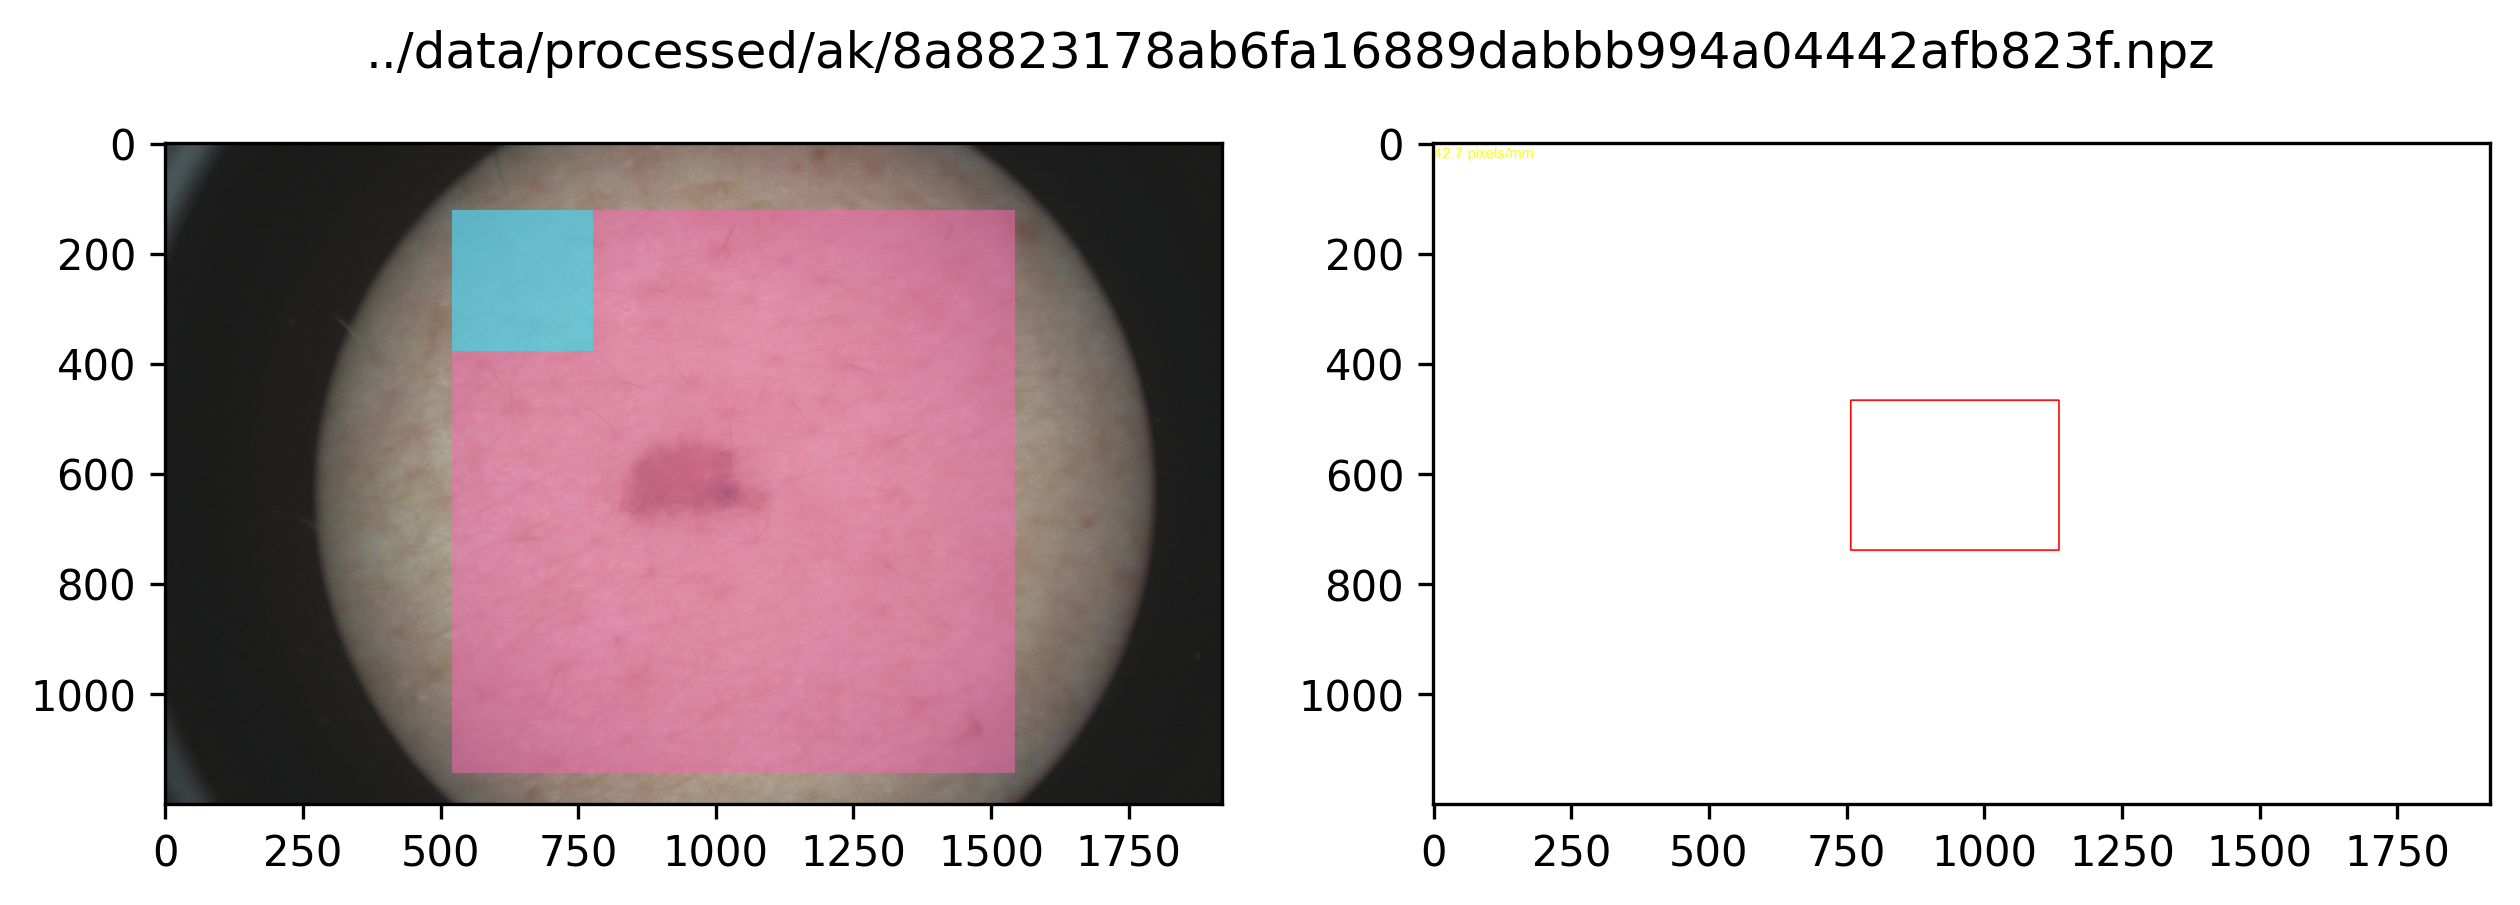

In [145]:
noise_image = np.repeat(np.atleast_3d(np.random.random((1200, 1920))), 3, axis=2)

def plot_image_data(example_file, xy=(520, 120), dpi=72, index=None):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.1), dpi=dpi)
    
    title = str(example_file)
    title = f"{index}: {title}" if index is not None else title
    fig.suptitle(title)

    with np.load(example_file) as data:        
        if "rgb" in data:
            example_rgb = data["rgb"]
        else:
            example_reflectance = data["reflectance"]
            example_rgb = example_reflectance[..., 0]
        ax1.imshow(example_rgb, vmin=0, vmax=1)
        ax1.add_patch(Rectangle(xy, 1024, 1024, alpha=0.5, fc="hotpink"))
        ax1.add_patch(Rectangle(xy, 256, 256, alpha=0.5, fc="cyan"))
        
        example_roi = data["roi"] if "roi" in data else np.ones_like(example_rgb)
        ax2.imshow(example_roi)

plot_image_data(example_file, dpi=300)

In [177]:
output_dir = Path("../output/cropped_images")
output_dir.mkdir(parents=True, exist_ok=True)
assert output_dir.exists()

image_size = 1024

def save_cropped_image(npz_file, xy):
    with np.load(npz_file) as data:        
        reflectance = data["reflectance"]
        wavelength = data["wavelength"]
        rgb = data["rgb"] if "rgb" in data else None
        roi = data["roi"] if "roi" in data else None
    
    # Crop image data.
    x, y = xy
    x_slice = slice(x, x + image_size)
    y_slice = slice(y, y + image_size)
    
    reflectance = reflectance[y_slice, x_slice]
    assert reflectance.shape == (image_size, image_size, 120)
    
    if rgb is not None:
        rgb = rgb[y_slice, x_slice]
        assert rgb.shape == (image_size, image_size, 3)
    
    if roi is not None:
        roi = roi[y_slice, x_slice]
        assert roi.shape == (image_size, image_size, 3)
    
    output_file = output_dir / npz_file.parent.name / npz_file.name
    output_file.parent.mkdir(parents=True, exist_ok=True)
    np.savez(output_file, reflectance=reflectance, wavelength=wavelength, rgb=rgb, roi=roi)        

In [143]:
import json

with (data_dir.parent / "crops.json").open("r") as f:
    xy_coords = json.load(f)
print(xy_coords)

{'0': [520, 120], '1': [520, 120], '2': [500, 110], '3': [500, 110], '4': [480, 110], '5': [480, 110], '6': [500, 110], '7': [480, 110], '8': [520, 120], '9': [520, 120], '10': [520, 120], '11': [520, 120], '12': [520, 120], '13': [520, 120], '14': [520, 120], '15': [520, 120], '16': [520, 120], '17': [520, 120], '18': [520, 120], '19': [520, 120], '20': [520, 120], '21': [520, 120], '22': [520, 120], '23': [520, 120], '24': [520, 120], '25': [520, 120], '26': [520, 120], '27': [520, 120], '28': [520, 120], '29': [520, 120], '30': [520, 120], '31': [520, 120], '32': [520, 120], '33': [520, 120], '34': [520, 120], '35': [520, 120], '37': [520, 120], '38': [520, 120], '39': [520, 120], '40': [520, 120], '41': [520, 120], '42': [520, 120], '43': [520, 120], '44': [520, 120], '45': [520, 120], '46': [520, 120], '47': [520, 120], '48': [520, 120], '49': [520, 120], '50': [520, 120], '51': [520, 120], '52': [520, 120], '53': [520, 120], '54': [520, 120], '55': [520, 120], '56': [520, 120], '

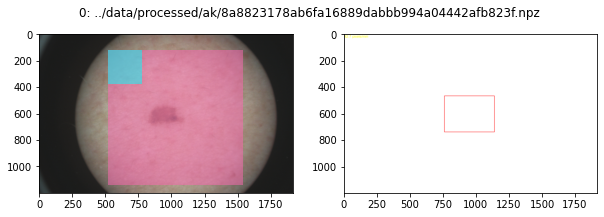

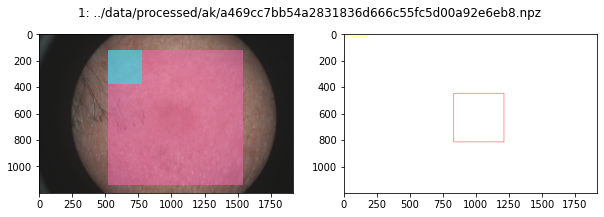

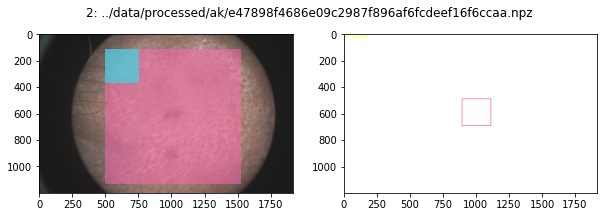

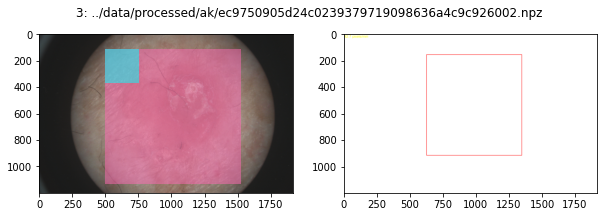

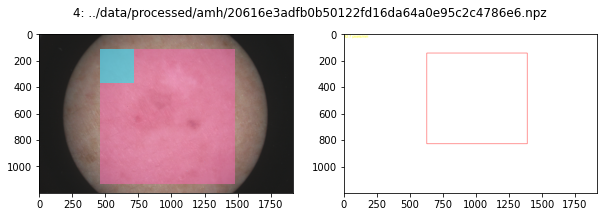

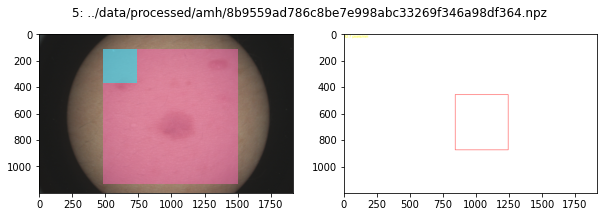

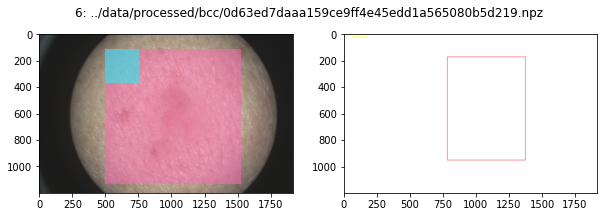

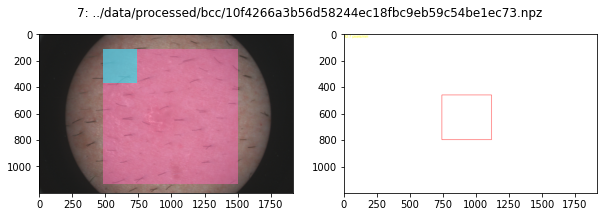

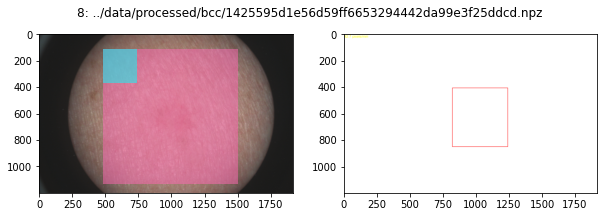

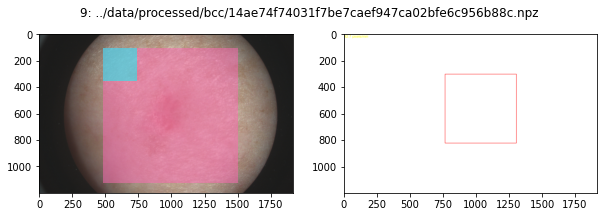

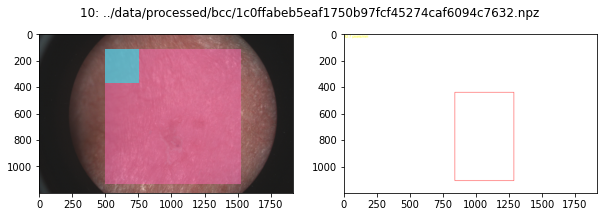

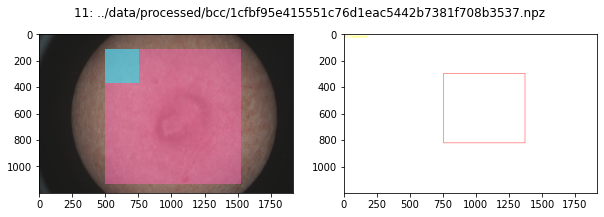

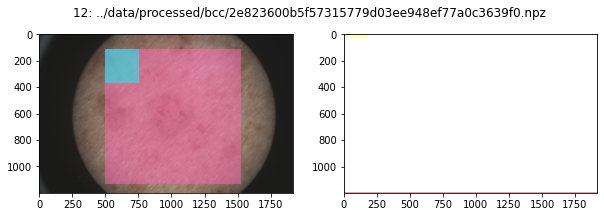

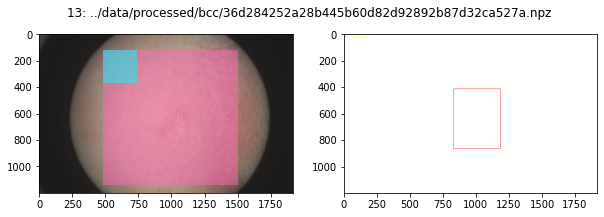

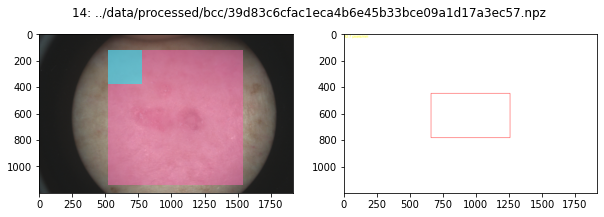

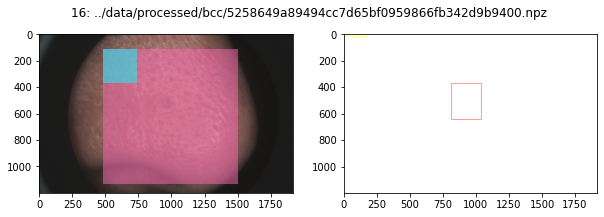

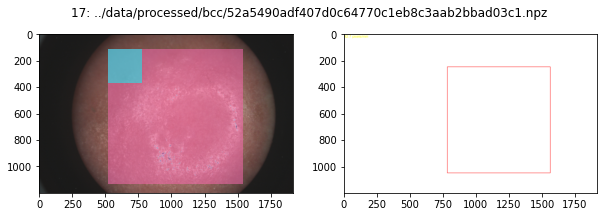

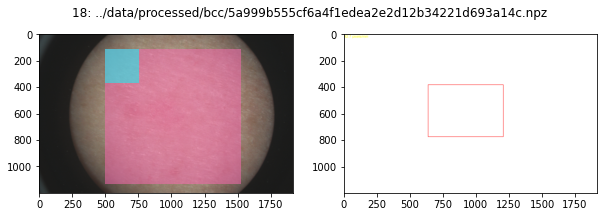

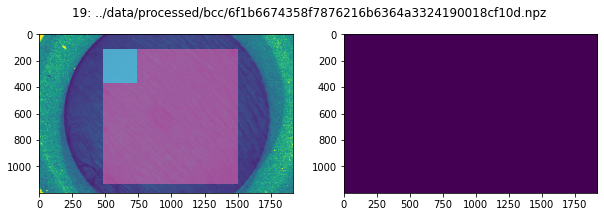

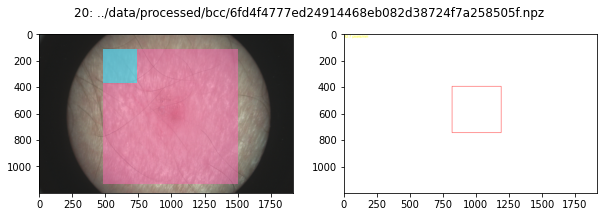

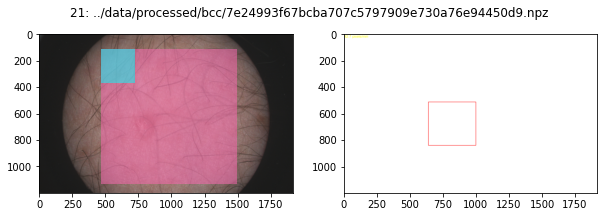

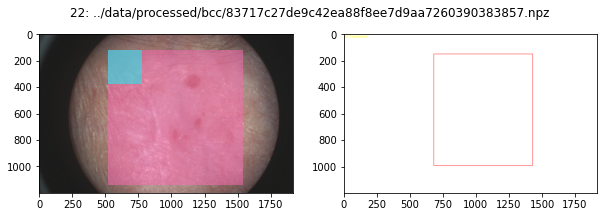

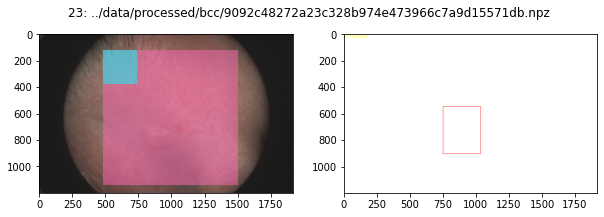

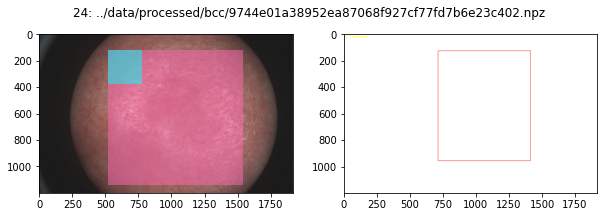

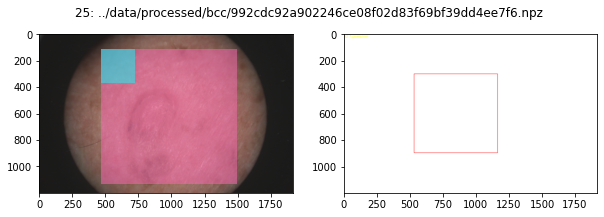

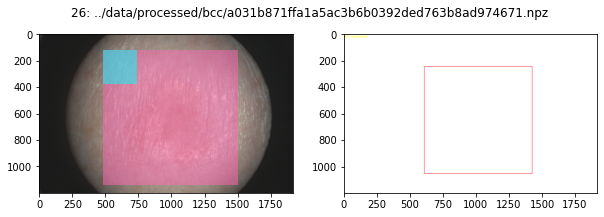

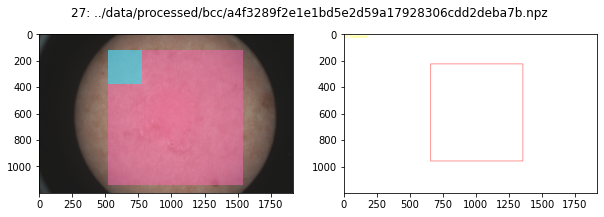

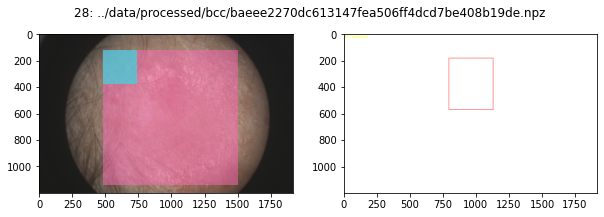

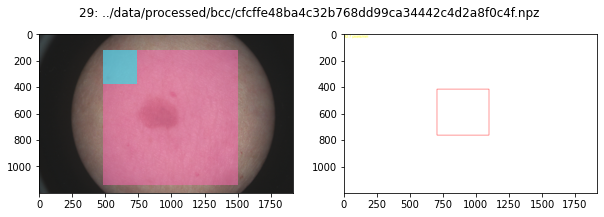

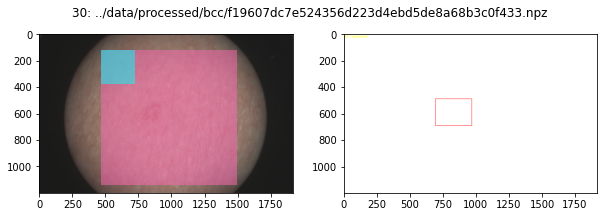

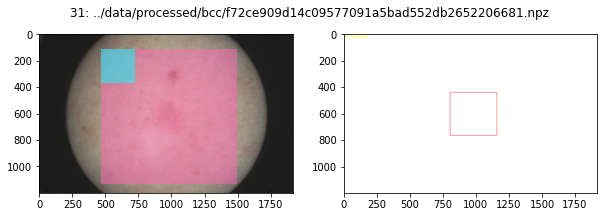

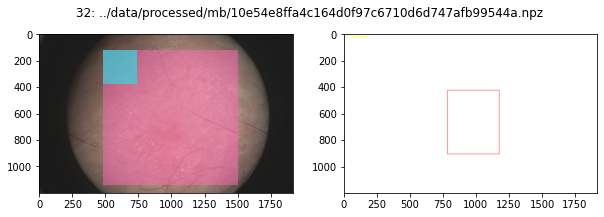

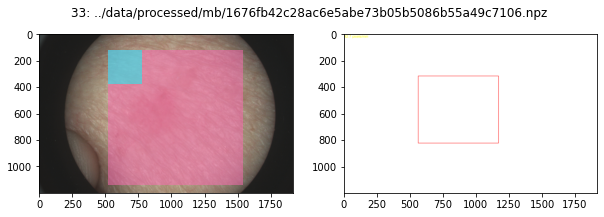

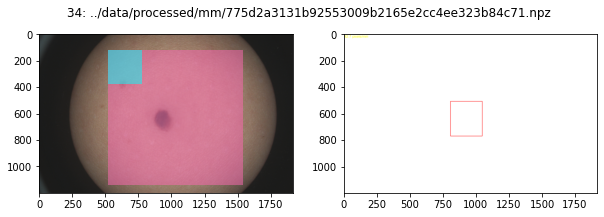

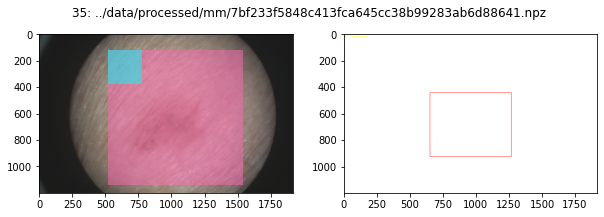

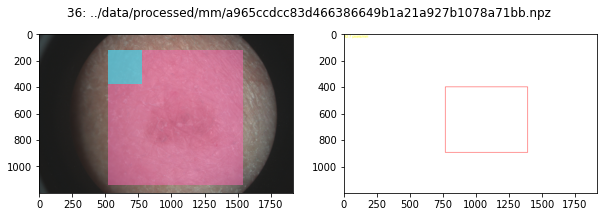

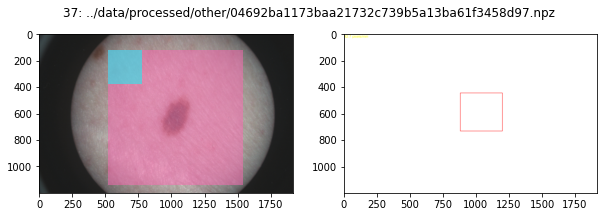

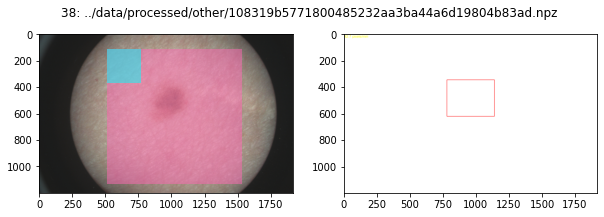

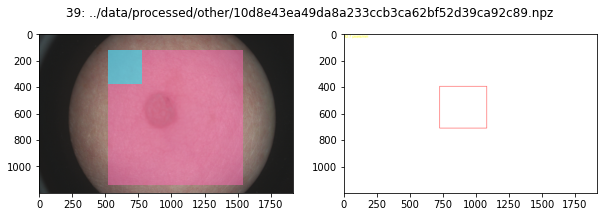

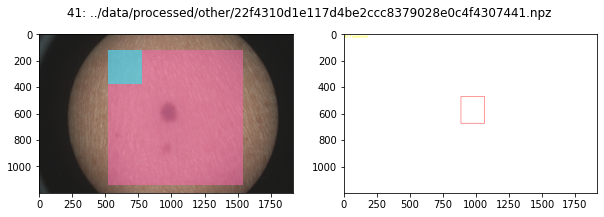

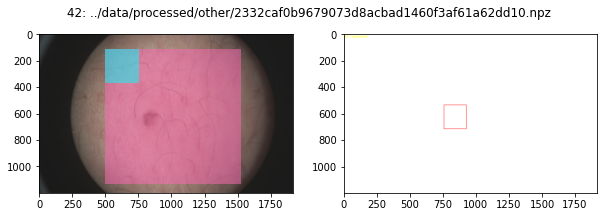

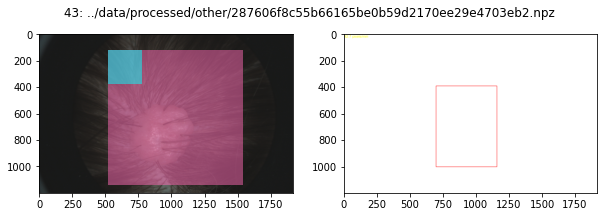

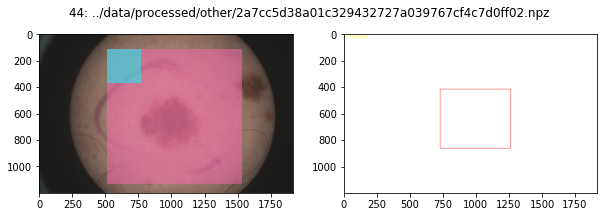

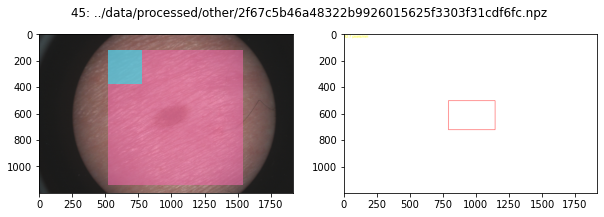

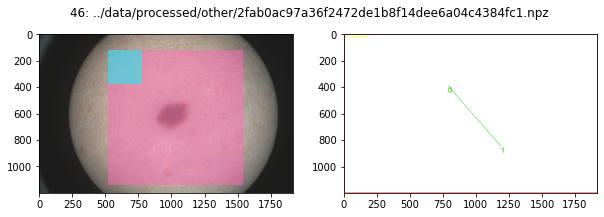

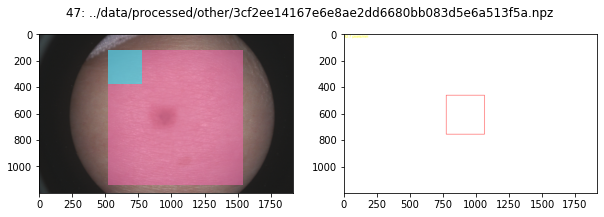

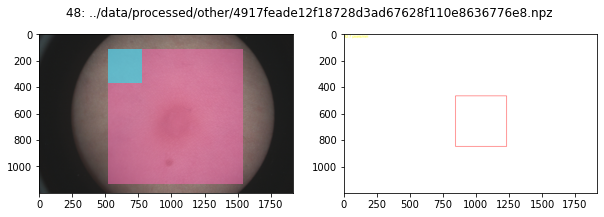

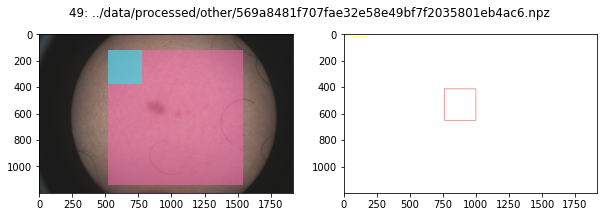

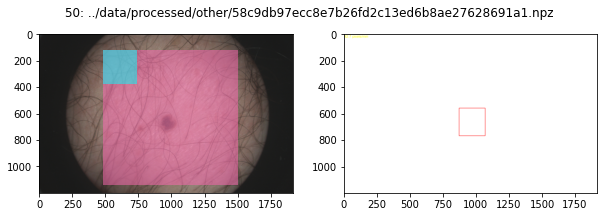

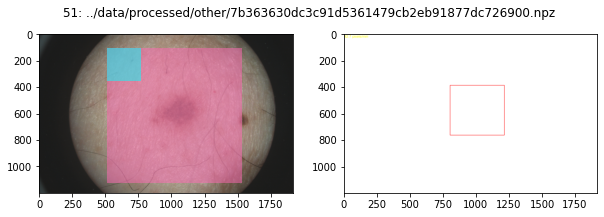

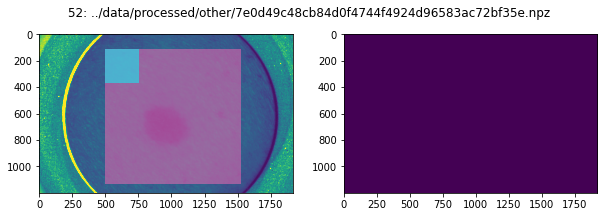

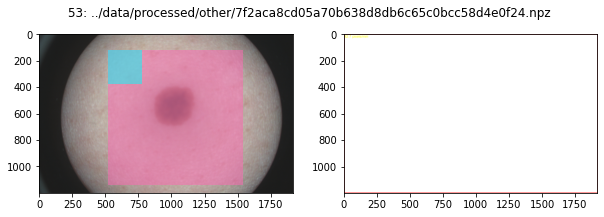

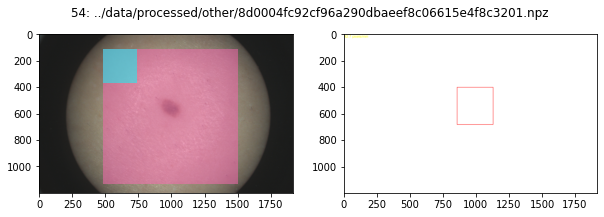

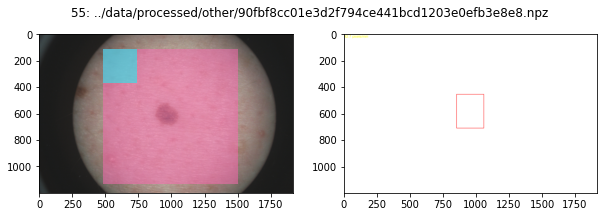

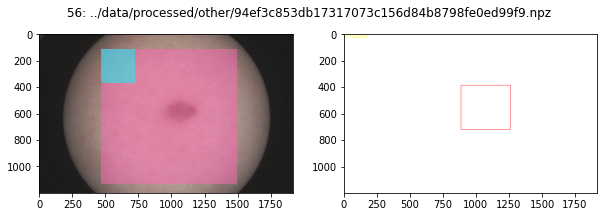

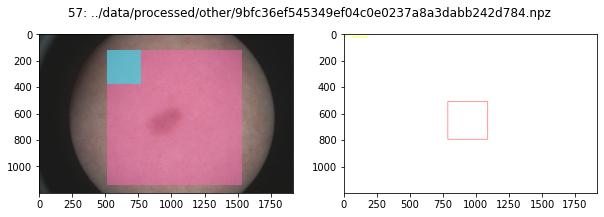

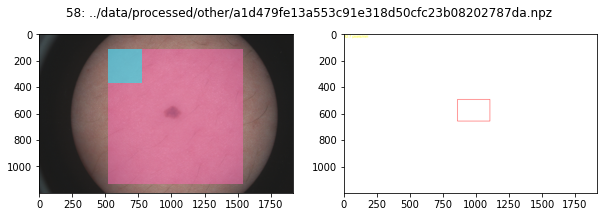

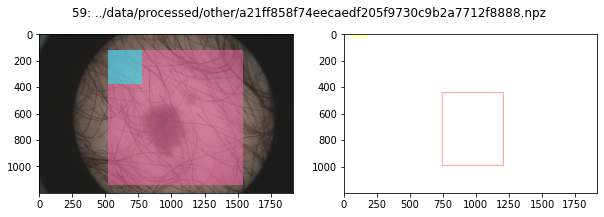

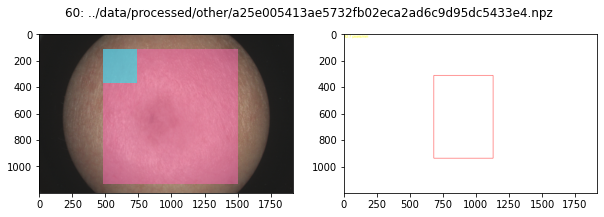

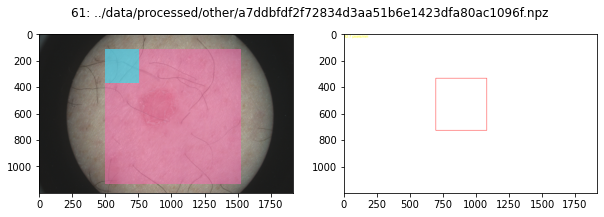

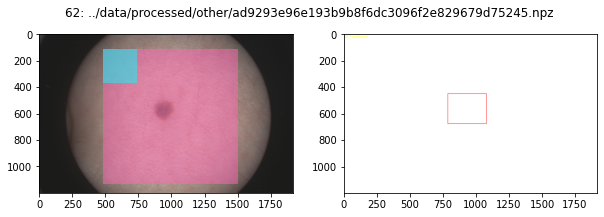

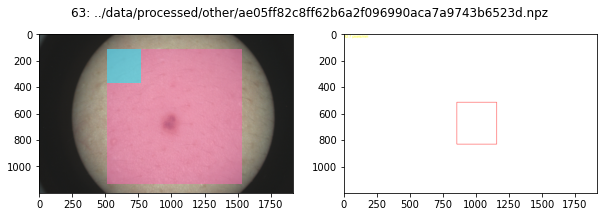

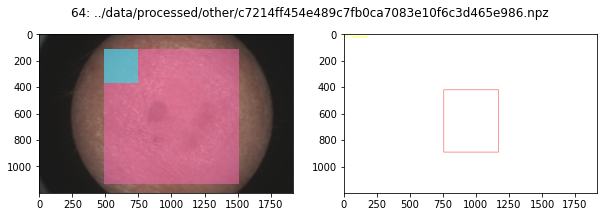

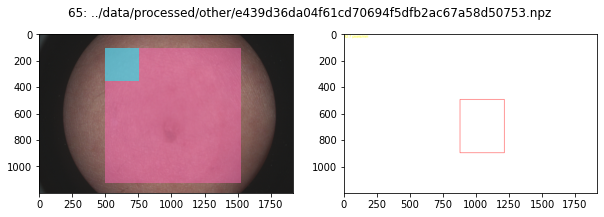

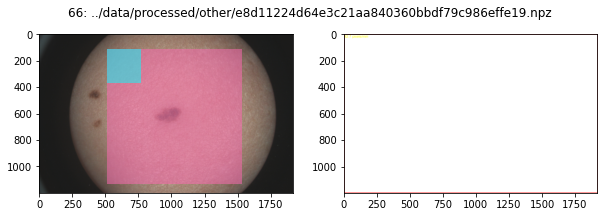

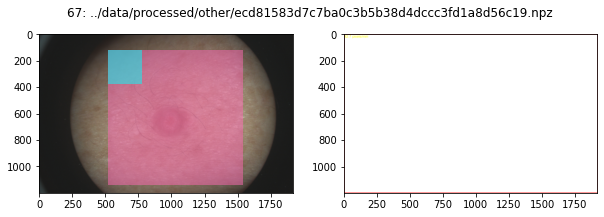

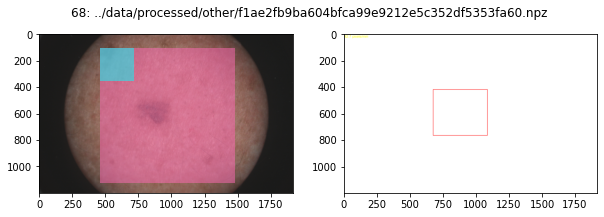

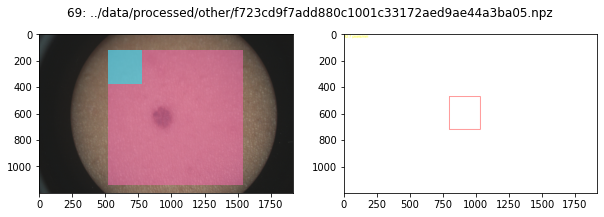

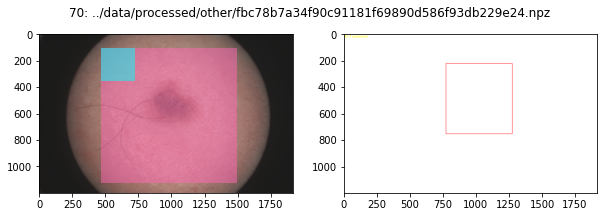

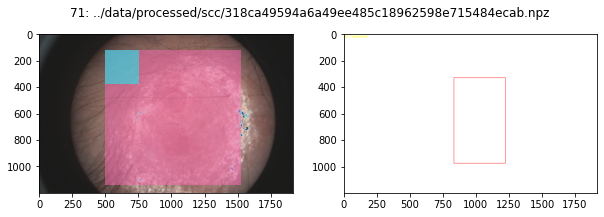

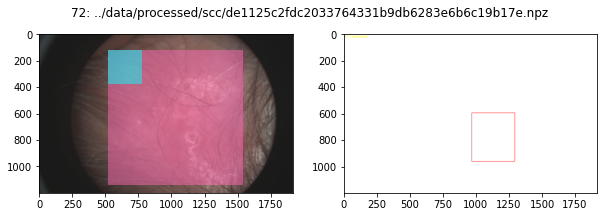

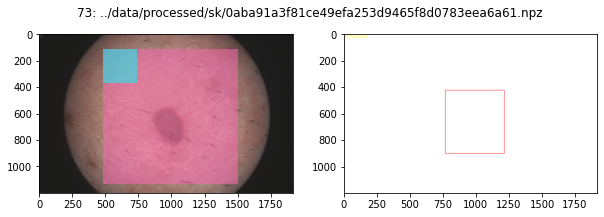

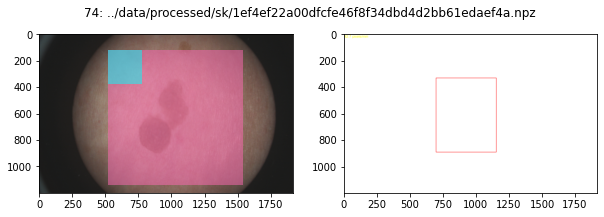

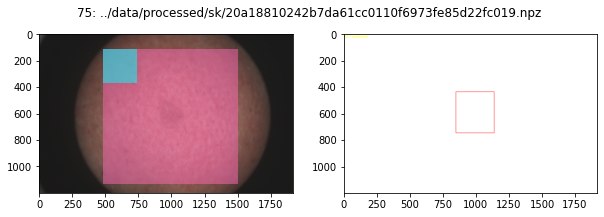

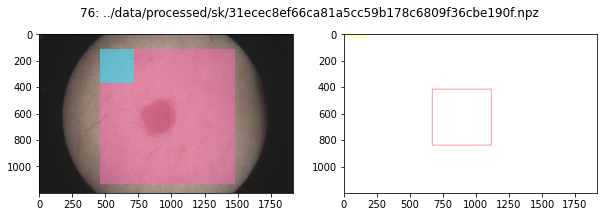

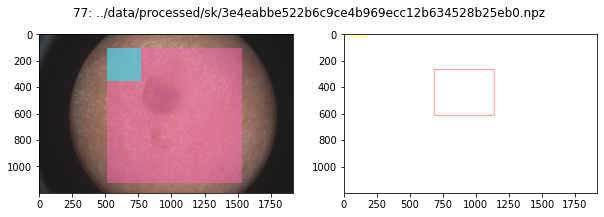

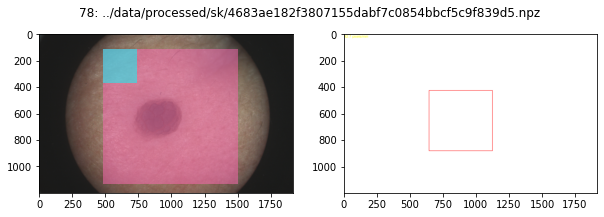

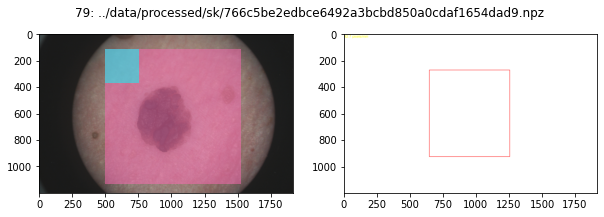

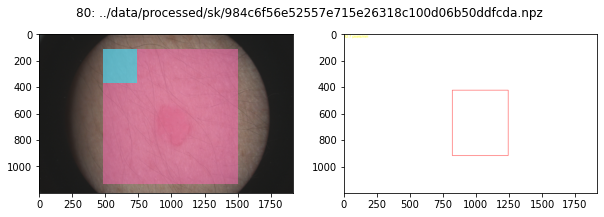

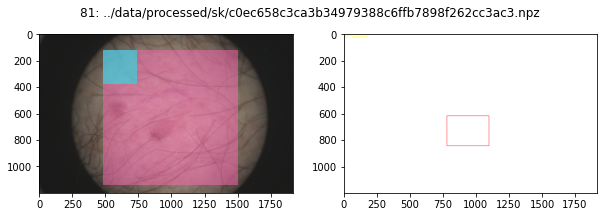

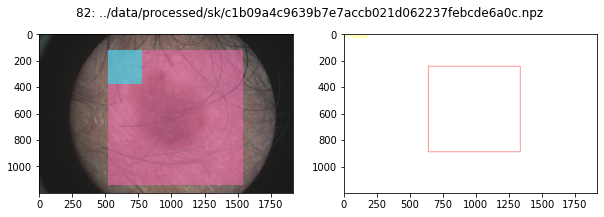

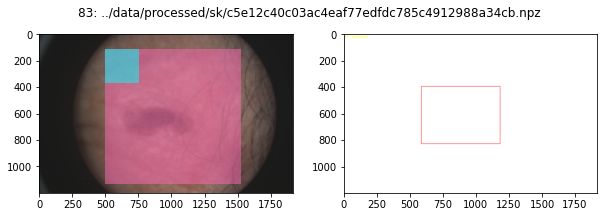

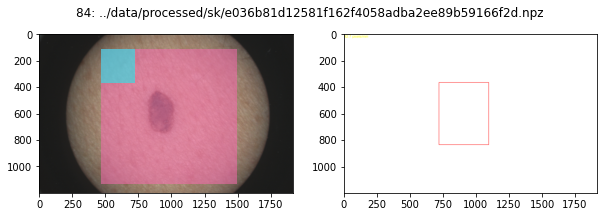

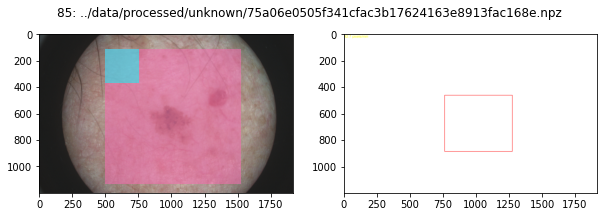

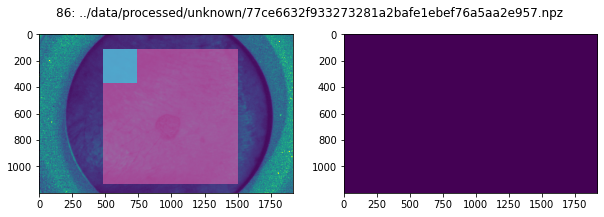

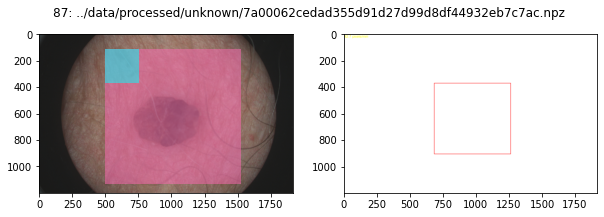

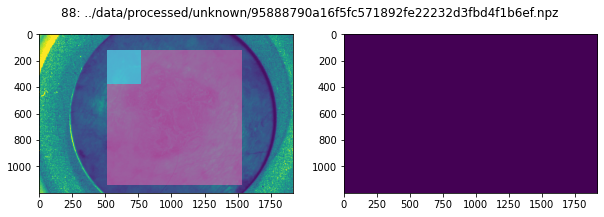

In [178]:
plt.rcParams.update({'figure.max_open_warning': 0})

skiplist = [15, 40]

with (data_dir.parent / "crops.json").open("r") as f:
    xy_coords = json.load(f)

skip_until = 0
for i, npz_file in enumerate(sorted(data_dir.rglob("*.npz"))):
    if i in skiplist:
        continue
    if skip_until > i:
        continue
    if i > 88:
        break
    xy = xy_coords[str(i)]
    plot_image_data(npz_file, dpi=72, index=i, xy=xy)
    save_cropped_image(npz_file, xy=xy)